In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Thesis/Train_dataset_3.csv', low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Thesis/Test_dataset_3.csv', low_memory=False)

Mounted at /content/drive


In [ ]:
n_repeats = 5
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'loss': []
}

In [ ]:
def create_sequences(data, seq_length=5):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length, :-1].values
        label = data.iloc[i+seq_length, -1]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


SEQ_LENGTH = 5
FEATURES = train.shape[1] - 1


X_train, y_train = create_sequences(train, SEQ_LENGTH)


X_test, y_test = create_sequences(test, SEQ_LENGTH)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

In [ ]:
for run in range(n_repeats):
    print(f"\n{'='*50}")
    print(f"Run {run+1}/{n_repeats}")
    print(f"{'='*50}")

    model = Sequential([
        LSTM(128, input_shape=(SEQ_LENGTH, FEATURES), return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(128, return_sequences=False),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.AUC(name='auc')])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        callbacks=callbacks,
        class_weight={0: 1, 1: 2},
        verbose=1
    )

    results = model.evaluate(X_test, y_test, verbose=0)
    metrics['loss'].append(results[0])
    metrics['accuracy'].append(results[1])
    metrics['precision'].append(results[2])
    metrics['recall'].append(results[3])
    metrics['auc'].append(results[4])

    print(f"\nRun {run+1} Results:")
    print(f"Test Loss: {results[0]:.4f}")
    print(f"Test Accuracy: {results[1]:.4f}")
    print(f"Test Precision: {results[2]:.4f}")
    print(f"Test Recall: {results[3]:.4f}")
    print(f"Test AUC: {results[4]:.4f}")


Run 1/5
Epoch 1/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8287 - auc: 0.9073 - loss: 0.5311 - precision: 0.8026 - recall: 0.8657

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8290 - auc: 0.9076 - loss: 0.5299 - precision: 0.8029 - recall: 0.8662 - val_accuracy: 0.9312 - val_auc: 0.9844 - val_loss: 0.2042 - val_precision: 0.8995 - val_recall: 0.9710
Epoch 2/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9187 - auc: 0.9754 - loss: 0.2771 - precision: 0.8901 - recall: 0.9547

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9187 - auc: 0.9754 - loss: 0.2770 - precision: 0.8902 - recall: 0.9547 - val_accuracy: 0.9426 - val_auc: 0.9879 - val_loss: 0.1529 - val_precision: 0.9177 - val_recall: 0.9725
Epoch 3/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9290 - auc: 0.9802 - loss: 0.2450 - precision: 0.9059 - recall: 0.9590

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9290 - auc: 0.9802 - loss: 0.2450 - precision: 0.9059 - recall: 0.9590 - val_accuracy: 0.9519 - val_auc: 0.9903 - val_loss: 0.1252 - val_precision: 0.9460 - val_recall: 0.9585
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9330 - auc: 0.9830 - loss: 0.2278 - precision: 0.9093 - recall: 0.9609 - val_accuracy: 0.9462 - val_auc: 0.9914 - val_loss: 0.1347 - val_precision: 0.9214 - val_recall: 0.9758
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9419 - auc: 0.9863 - loss: 0.2056 - precision: 0.9233 - recall: 0.9644 - val_accuracy: 0.9489 - val_auc: 0.9927 - val_loss: 0.1274 - val_precision: 0.9228 - val_recall: 0.9797
Epoch 6/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9406 - auc: 0.9871 - loss: 0.1997 - precision: 0.9217 - recall: 0.9639

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9406 - auc: 0.9871 - loss: 0.1997 - precision: 0.9217 - recall: 0.9639 - val_accuracy: 0.9596 - val_auc: 0.9935 - val_loss: 0.1038 - val_precision: 0.9483 - val_recall: 0.9722
Epoch 7/100
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9462 - auc: 0.9890 - loss: 0.1832 - precision: 0.9282 - recall: 0.9674

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9462 - auc: 0.9890 - loss: 0.1832 - precision: 0.9282 - recall: 0.9675 - val_accuracy: 0.9622 - val_auc: 0.9947 - val_loss: 0.0999 - val_precision: 0.9475 - val_recall: 0.9787
Epoch 8/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9514 - auc: 0.9900 - loss: 0.1707 - precision: 0.9346 - recall: 0.9704

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9514 - auc: 0.9900 - loss: 0.1708 - precision: 0.9346 - recall: 0.9704 - val_accuracy: 0.9599 - val_auc: 0.9953 - val_loss: 0.0993 - val_precision: 0.9414 - val_recall: 0.9808
Epoch 9/100
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9523 - auc: 0.9912 - loss: 0.1604 - precision: 0.9330 - recall: 0.9739

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9523 - auc: 0.9912 - loss: 0.1604 - precision: 0.9330 - recall: 0.9739 - val_accuracy: 0.9639 - val_auc: 0.9955 - val_loss: 0.0931 - val_precision: 0.9464 - val_recall: 0.9835
Epoch 10/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9533 - auc: 0.9915 - loss: 0.1580 - precision: 0.9350 - recall: 0.9739

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9533 - auc: 0.9915 - loss: 0.1580 - precision: 0.9350 - recall: 0.9739 - val_accuracy: 0.9665 - val_auc: 0.9959 - val_loss: 0.0866 - val_precision: 0.9545 - val_recall: 0.9797
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9585 - auc: 0.9926 - loss: 0.1474 - precision: 0.9426 - recall: 0.9762 - val_accuracy: 0.9459 - val_auc: 0.9947 - val_loss: 0.1443 - val_precision: 0.9084 - val_recall: 0.9918
Epoch 12/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9604 - auc: 0.9929 - loss: 0.1417 - precision: 0.9460 - recall: 0.9764

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9604 - auc: 0.9929 - loss: 0.1417 - precision: 0.9460 - recall: 0.9764 - val_accuracy: 0.9692 - val_auc: 0.9963 - val_loss: 0.0787 - val_precision: 0.9578 - val_recall: 0.9818
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9598 - auc: 0.9928 - loss: 0.1413 - precision: 0.9455 - recall: 0.9756

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9598 - auc: 0.9928 - loss: 0.1413 - precision: 0.9455 - recall: 0.9756 - val_accuracy: 0.9727 - val_auc: 0.9968 - val_loss: 0.0700 - val_precision: 0.9676 - val_recall: 0.9783
Epoch 14/100
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9607 - auc: 0.9930 - loss: 0.1387 - precision: 0.9459 - recall: 0.9774

500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9607 - auc: 0.9930 - loss: 0.1387 - precision: 0.9459 - recall: 0.9774 - val_accuracy: 0.9742 - val_auc: 0.9972 - val_loss: 0.0664 - val_precision: 0.9707 - val_recall: 0.9780
Epoch 15/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9652 - auc: 0.9947 - loss: 0.1225 - precision: 0.9537 - recall: 0.9779 - val_accuracy: 0.9751 - val_auc: 0.9973 - val_loss: 0.0672 - val_precision: 0.9691 - val_recall: 0.9815
Epoch 16/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9638 - auc: 0.9941 - loss: 0.1273 - precision: 0.9504 - recall: 0.9789 - val_accuracy: 0.9755 - val_auc: 0.9971 - val_loss: 0.0673 - val_precision: 0.9666 - val_recall: 0.9850
Epoch 17/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9665 - auc: 0.9948 - loss: 0.1180 - precision: 0.9542 - recall: 0.9803 - val_accuracy: 0.9737 - val_auc: 0.9971 - val_loss: 0.0732 - val_precision: 0.9608 - val_recall: 0.9877
Epoch 18/100
495/500 ━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9670 - auc: 0.9944 - loss: 0.1190 - precision: 0.9525 - recall: 0.9818 - val_accuracy: 0.9776 - val_auc: 0.9975 - val_loss: 0.0638 - val_precision: 0.9702 - val_recall: 0.9855
Epoch 19/100
495/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9712 - auc: 0.9964 - loss: 0.1010 - precision: 0.9595 - recall: 0.9839

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9712 - auc: 0.9964 - loss: 0.1010 - precision: 0.9595 - recall: 0.9839 - val_accuracy: 0.9791 - val_auc: 0.9976 - val_loss: 0.0591 - val_precision: 0.9764 - val_recall: 0.9820
Epoch 20/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9698 - auc: 0.9950 - loss: 0.1120 - precision: 0.9584 - recall: 0.9826 - val_accuracy: 0.9796 - val_auc: 0.9977 - val_loss: 0.0601 - val_precision: 0.9724 - val_recall: 0.9872
Epoch 21/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9697 - auc: 0.9954 - loss: 0.1122 - precision: 0.9592 - recall: 0.9814 - val_accuracy: 0.9771 - val_auc: 0.9977 - val_loss: 0.0628 - val_precision: 0.9865 - val_recall: 0.9675
Epoch 22/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9721 - auc: 0.9962 - loss: 0.1007 - precision: 0.9605 - recall: 0.9851

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9721 - auc: 0.9962 - loss: 0.1007 - precision: 0.9604 - recall: 0.9851 - val_accuracy: 0.9799 - val_auc: 0.9976 - val_loss: 0.0556 - val_precision: 0.9741 - val_recall: 0.9860
Epoch 23/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9728 - auc: 0.9965 - loss: 0.0962 - precision: 0.9622 - recall: 0.9842

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9728 - auc: 0.9965 - loss: 0.0962 - precision: 0.9622 - recall: 0.9842 - val_accuracy: 0.9809 - val_auc: 0.9979 - val_loss: 0.0554 - val_precision: 0.9744 - val_recall: 0.9877
Epoch 24/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9735 - auc: 0.9962 - loss: 0.0988 - precision: 0.9632 - recall: 0.9847 - val_accuracy: 0.9786 - val_auc: 0.9978 - val_loss: 0.0621 - val_precision: 0.9668 - val_recall: 0.9912
Epoch 25/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9746 - auc: 0.9963 - loss: 0.0959 - precision: 0.9645 - recall: 0.9851 - val_accuracy: 0.9721 - val_auc: 0.9969 - val_loss: 0.0763 - val_precision: 0.9536 - val_recall: 0.9925
Epoch 26/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9748 - auc: 0.9965 - loss: 0.0913 - precision: 0.9646 - recall: 0.9857 - val_accuracy: 0.9761 - val_auc: 0.9976 - val_loss: 0.0675 - val_precision: 0.9610 - val_recall: 0.9925
Epoch 27/100
500/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9772 - auc: 0.9965 - loss: 0.0871 - precision: 0.9677 - recall: 0.9870 - val_accuracy: 0.9829 - val_auc: 0.9984 - val_loss: 0.0485 - val_precision: 0.9830 - val_recall: 0.9827
Epoch 30/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9779 - auc: 0.9970 - loss: 0.0831 - precision: 0.9697 - recall: 0.9868 - val_accuracy: 0.9834 - val_auc: 0.9983 - val_loss: 0.0508 - val_precision: 0.9766 - val_recall: 0.9905
Epoch 31/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9774 - auc: 0.9972 - loss: 0.0811 - precision: 0.9690 - recall: 0.9866 - val_accuracy: 0.9821 - val_auc: 0.9984 - val_loss: 0.0492 - val_precision: 0.9763 - val_recall: 0.9883
Epoch 32/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9786 - auc: 0.9974 - loss: 0.0799 - precision: 0.9697 - recall: 0.9880 - val_accuracy: 0.9821 - val_auc: 0.9983 - val_loss: 0.0492 - val_precision: 0.9871 - val_recall: 0.9770
Epoch 33/100
500/500 ━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9785 - auc: 0.9975 - loss: 0.0763 - precision: 0.9692 - recall: 0.9883 - val_accuracy: 0.9854 - val_auc: 0.9985 - val_loss: 0.0447 - val_precision: 0.9865 - val_recall: 0.9843
Epoch 36/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9796 - auc: 0.9978 - loss: 0.0734 - precision: 0.9724 - recall: 0.9878 - val_accuracy: 0.9837 - val_auc: 0.9983 - val_loss: 0.0473 - val_precision: 0.9889 - val_recall: 0.9785
Epoch 37/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9792 - auc: 0.9974 - loss: 0.0779 - precision: 0.9716 - recall: 0.9872 - val_accuracy: 0.9845 - val_auc: 0.9982 - val_loss: 0.0469 - val_precision: 0.9850 - val_recall: 0.9840
Epoch 38/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9819 - auc: 0.9980 - loss: 0.0676 - precision: 0.9737 - recall: 0.9903

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9819 - auc: 0.9980 - loss: 0.0677 - precision: 0.9737 - recall: 0.9903 - val_accuracy: 0.9849 - val_auc: 0.9985 - val_loss: 0.0433 - val_precision: 0.9840 - val_recall: 0.9858
Epoch 39/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9811 - auc: 0.9977 - loss: 0.0690 - precision: 0.9740 - recall: 0.9887 - val_accuracy: 0.9741 - val_auc: 0.9983 - val_loss: 0.0675 - val_precision: 0.9932 - val_recall: 0.9548
Epoch 40/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9824 - auc: 0.9982 - loss: 0.0645 - precision: 0.9747 - recall: 0.9905 - val_accuracy: 0.9842 - val_auc: 0.9984 - val_loss: 0.0446 - val_precision: 0.9874 - val_recall: 0.9810
Epoch 41/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9817 - auc: 0.9978 - loss: 0.0669 - precision: 0.9751 - recall: 0.9889 - val_accuracy: 0.9800 - val_auc: 0.9985 - val_loss: 0.0532 - val_precision: 0.9921 - val_recall: 0.9678
Epoch 42/100
500/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9826 - auc: 0.9979 - loss: 0.0651 - precision: 0.9758 - recall: 0.9898 - val_accuracy: 0.9875 - val_auc: 0.9983 - val_loss: 0.0409 - val_precision: 0.9858 - val_recall: 0.9893
Epoch 44/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9800 - auc: 0.9977 - loss: 0.0692 - precision: 0.9711 - recall: 0.9892 - val_accuracy: 0.9817 - val_auc: 0.9984 - val_loss: 0.0510 - val_precision: 0.9711 - val_recall: 0.9930
Epoch 45/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9836 - auc: 0.9984 - loss: 0.0592 - precision: 0.9760 - recall: 0.9914

500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9836 - auc: 0.9984 - loss: 0.0593 - precision: 0.9760 - recall: 0.9914 - val_accuracy: 0.9856 - val_auc: 0.9987 - val_loss: 0.0407 - val_precision: 0.9824 - val_recall: 0.9890
Epoch 46/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9840 - auc: 0.9983 - loss: 0.0596 - precision: 0.9780 - recall: 0.9908

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9840 - auc: 0.9983 - loss: 0.0596 - precision: 0.9780 - recall: 0.9908 - val_accuracy: 0.9861 - val_auc: 0.9984 - val_loss: 0.0397 - val_precision: 0.9843 - val_recall: 0.9880
Epoch 47/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9837 - auc: 0.9982 - loss: 0.0621 - precision: 0.9765 - recall: 0.9911 - val_accuracy: 0.9846 - val_auc: 0.9989 - val_loss: 0.0428 - val_precision: 0.9919 - val_recall: 0.9772
Epoch 48/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9849 - auc: 0.9981 - loss: 0.0600 - precision: 0.9784 - recall: 0.9917 - val_accuracy: 0.9776 - val_auc: 0.9975 - val_loss: 0.0636 - val_precision: 0.9618 - val_recall: 0.9948
Epoch 49/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9825 - auc: 0.9977 - loss: 0.0631 - precision: 0.9749 - recall: 0.9907

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9825 - auc: 0.9977 - loss: 0.0631 - precision: 0.9749 - recall: 0.9907 - val_accuracy: 0.9867 - val_auc: 0.9987 - val_loss: 0.0388 - val_precision: 0.9841 - val_recall: 0.9895
Epoch 50/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9846 - auc: 0.9985 - loss: 0.0574 - precision: 0.9781 - recall: 0.9916 - val_accuracy: 0.9841 - val_auc: 0.9985 - val_loss: 0.0429 - val_precision: 0.9773 - val_recall: 0.9912
Epoch 51/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9836 - auc: 0.9980 - loss: 0.0611 - precision: 0.9769 - recall: 0.9909 - val_accuracy: 0.9857 - val_auc: 0.9986 - val_loss: 0.0412 - val_precision: 0.9793 - val_recall: 0.9925
Epoch 52/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9857 - auc: 0.9985 - loss: 0.0533 - precision: 0.9806 - recall: 0.9912 - val_accuracy: 0.9777 - val_auc: 0.9978 - val_loss: 0.0642 - val_precision: 0.9616 - val_recall: 0.9952
Epoch 53/100
495/500 ━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9858 - auc: 0.9985 - loss: 0.0556 - precision: 0.9795 - recall: 0.9921 - val_accuracy: 0.9877 - val_auc: 0.9989 - val_loss: 0.0356 - val_precision: 0.9873 - val_recall: 0.9883
Epoch 54/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9859 - auc: 0.9987 - loss: 0.0530 - precision: 0.9802 - recall: 0.9918 - val_accuracy: 0.9871 - val_auc: 0.9985 - val_loss: 0.0379 - val_precision: 0.9865 - val_recall: 0.9877
Epoch 55/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9856 - auc: 0.9982 - loss: 0.0554 - precision: 0.9805 - recall: 0.9911 - val_accuracy: 0.9805 - val_auc: 0.9988 - val_loss: 0.0503 - val_precision: 0.9936 - val_recall: 0.9672
Epoch 56/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9846 - auc: 0.9982 - loss: 0.0563 - precision: 0.9789 - recall: 0.9907 - val_accuracy: 0.9875 - val_auc: 0.9989 - val_loss: 0.0358 - val_precision: 0.9873 - val_recall: 0.9877
Epoch 57/100
500/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9859 - auc: 0.9984 - loss: 0.0543 - precision: 0.9812 - recall: 0.9908 - val_accuracy: 0.9881 - val_auc: 0.9990 - val_loss: 0.0356 - val_precision: 0.9880 - val_recall: 0.9883
Epoch 58/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9860 - auc: 0.9984 - loss: 0.0535 - precision: 0.9800 - recall: 0.9923 - val_accuracy: 0.9866 - val_auc: 0.9991 - val_loss: 0.0389 - val_precision: 0.9810 - val_recall: 0.9925
Epoch 59/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9855 - auc: 0.9987 - loss: 0.0511 - precision: 0.9789 - recall: 0.9926 - val_accuracy: 0.9865 - val_auc: 0.9987 - val_loss: 0.0361 - val_precision: 0.9853 - val_recall: 0.9877
Epoch 60/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9878 - auc: 0.9985 - loss: 0.0498 - precision: 0.9825 - recall: 0.9931 - val_accuracy: 0.9867 - val_auc: 0.9990 - val_loss: 0.0369 - val_precision: 0.9902 - val_recall: 0.9833
Epoch 61/100
500/500 ━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9854 - auc: 0.9985 - loss: 0.0521 - precision: 0.9796 - recall: 0.9917 - val_accuracy: 0.9877 - val_auc: 0.9990 - val_loss: 0.0346 - val_precision: 0.9834 - val_recall: 0.9923
Epoch 63/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9845 - auc: 0.9985 - loss: 0.0550 - precision: 0.9782 - recall: 0.9911 - val_accuracy: 0.9876 - val_auc: 0.9990 - val_loss: 0.0347 - val_precision: 0.9846 - val_recall: 0.9908
Epoch 64/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9874 - auc: 0.9989 - loss: 0.0466 - precision: 0.9834 - recall: 0.9917 - val_accuracy: 0.9866 - val_auc: 0.9987 - val_loss: 0.0369 - val_precision: 0.9814 - val_recall: 0.9920
Epoch 65/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9872 - auc: 0.9990 - loss: 0.0454 - precision: 0.9821 - recall: 0.9926 - val_accuracy: 0.9877 - val_auc: 0.9989 - val_loss: 0.0365 - val_precision: 0.9824 - val_recall: 0.9933
Epoch 66/100
498/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9878 - auc: 0.9989 - loss: 0.0460 - precision: 0.9829 - recall: 0.9930 - val_accuracy: 0.9881 - val_auc: 0.9990 - val_loss: 0.0342 - val_precision: 0.9837 - val_recall: 0.9927
Epoch 67/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9876 - auc: 0.9990 - loss: 0.0464 - precision: 0.9827 - recall: 0.9927 - val_accuracy: 0.9850 - val_auc: 0.9987 - val_loss: 0.0397 - val_precision: 0.9767 - val_recall: 0.9937
Epoch 68/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9877 - auc: 0.9989 - loss: 0.0448 - precision: 0.9825 - recall: 0.9929 - val_accuracy: 0.9872 - val_auc: 0.9986 - val_loss: 0.0370 - val_precision: 0.9810 - val_recall: 0.9937
Epoch 69/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9868 - auc: 0.9990 - loss: 0.0446 - precision: 0.9821 - recall: 0.9917 - val_accuracy: 0.9842 - val_auc: 0.9985 - val_loss: 0.0436 - val_precision: 0.9748 - val_recall: 0.9942
Epoch 70/100
499/500 ━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9883 - auc: 0.9990 - loss: 0.0420 - precision: 0.9845 - recall: 0.9925 - val_accuracy: 0.9881 - val_auc: 0.9992 - val_loss: 0.0339 - val_precision: 0.9919 - val_recall: 0.9843
Epoch 71/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9873 - auc: 0.9987 - loss: 0.0479 - precision: 0.9820 - recall: 0.9930 - val_accuracy: 0.9879 - val_auc: 0.9990 - val_loss: 0.0340 - val_precision: 0.9832 - val_recall: 0.9927
Epoch 72/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9865 - auc: 0.9989 - loss: 0.0472 - precision: 0.9807 - recall: 0.9923

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9865 - auc: 0.9989 - loss: 0.0472 - precision: 0.9807 - recall: 0.9923 - val_accuracy: 0.9885 - val_auc: 0.9992 - val_loss: 0.0322 - val_precision: 0.9853 - val_recall: 0.9918
Epoch 73/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9874 - auc: 0.9989 - loss: 0.0451 - precision: 0.9820 - recall: 0.9932 - val_accuracy: 0.9854 - val_auc: 0.9986 - val_loss: 0.0409 - val_precision: 0.9767 - val_recall: 0.9945
Epoch 74/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9875 - auc: 0.9989 - loss: 0.0453 - precision: 0.9816 - recall: 0.9937 - val_accuracy: 0.9872 - val_auc: 0.9985 - val_loss: 0.0374 - val_precision: 0.9810 - val_recall: 0.9937
Epoch 75/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9883 - auc: 0.9988 - loss: 0.0430 - precision: 0.9836 - recall: 0.9931 - val_accuracy: 0.9872 - val_auc: 0.9989 - val_loss: 0.0354 - val_precision: 0.9810 - val_recall: 0.9937
Epoch 76/100
498/500 ━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9890 - auc: 0.9991 - loss: 0.0392 - precision: 0.9840 - recall: 0.9944 - val_accuracy: 0.9887 - val_auc: 0.9992 - val_loss: 0.0313 - val_precision: 0.9868 - val_recall: 0.9908
Epoch 77/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9887 - auc: 0.9991 - loss: 0.0425 - precision: 0.9839 - recall: 0.9936 - val_accuracy: 0.9822 - val_auc: 0.9992 - val_loss: 0.0458 - val_precision: 0.9934 - val_recall: 0.9710
Epoch 78/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9901 - auc: 0.9989 - loss: 0.0407 - precision: 0.9869 - recall: 0.9933

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9901 - auc: 0.9989 - loss: 0.0407 - precision: 0.9869 - recall: 0.9933 - val_accuracy: 0.9894 - val_auc: 0.9994 - val_loss: 0.0286 - val_precision: 0.9880 - val_recall: 0.9908
Epoch 79/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9883 - auc: 0.9990 - loss: 0.0416 - precision: 0.9833 - recall: 0.9937 - val_accuracy: 0.9882 - val_auc: 0.9986 - val_loss: 0.0335 - val_precision: 0.9844 - val_recall: 0.9923
Epoch 80/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9903 - auc: 0.9992 - loss: 0.0383 - precision: 0.9867 - recall: 0.9939 - val_accuracy: 0.9890 - val_auc: 0.9993 - val_loss: 0.0299 - val_precision: 0.9888 - val_recall: 0.9893
Epoch 81/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9883 - auc: 0.9989 - loss: 0.0411 - precision: 0.9836 - recall: 0.9932 - val_accuracy: 0.9886 - val_auc: 0.9990 - val_loss: 0.0300 - val_precision: 0.9895 - val_recall: 0.9877
Epoch 82/100
500/500 ━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9909 - auc: 0.9993 - loss: 0.0330 - precision: 0.9875 - recall: 0.9943 - val_accuracy: 0.9899 - val_auc: 0.9992 - val_loss: 0.0282 - val_precision: 0.9859 - val_recall: 0.9940
Epoch 85/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9902 - auc: 0.9992 - loss: 0.0377 - precision: 0.9862 - recall: 0.9945 - val_accuracy: 0.9891 - val_auc: 0.9995 - val_loss: 0.0288 - val_precision: 0.9920 - val_recall: 0.9862
Epoch 86/100
495/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9897 - auc: 0.9993 - loss: 0.0375 - precision: 0.9858 - recall: 0.9937

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9896 - auc: 0.9993 - loss: 0.0376 - precision: 0.9858 - recall: 0.9937 - val_accuracy: 0.9907 - val_auc: 0.9992 - val_loss: 0.0265 - val_precision: 0.9903 - val_recall: 0.9912
Epoch 87/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9896 - auc: 0.9992 - loss: 0.0378 - precision: 0.9857 - recall: 0.9938 - val_accuracy: 0.9886 - val_auc: 0.9988 - val_loss: 0.0337 - val_precision: 0.9834 - val_recall: 0.9940
Epoch 88/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9888 - auc: 0.9991 - loss: 0.0398 - precision: 0.9844 - recall: 0.9932 - val_accuracy: 0.9864 - val_auc: 0.9984 - val_loss: 0.0421 - val_precision: 0.9765 - val_recall: 0.9967
Epoch 89/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9908 - auc: 0.9993 - loss: 0.0344 - precision: 0.9870 - recall: 0.9950 - val_accuracy: 0.9892 - val_auc: 0.9993 - val_loss: 0.0295 - val_precision: 0.9905 - val_recall: 0.9880
Epoch 90/100
500/500 ━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9924 - auc: 0.9994 - loss: 0.0301 - precision: 0.9889 - recall: 0.9960 - val_accuracy: 0.9905 - val_auc: 0.9991 - val_loss: 0.0261 - val_precision: 0.9898 - val_recall: 0.9912
Epoch 93/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9904 - auc: 0.9994 - loss: 0.0333 - precision: 0.9873 - recall: 0.9937 - val_accuracy: 0.9894 - val_auc: 0.9992 - val_loss: 0.0301 - val_precision: 0.9851 - val_recall: 0.9937
Epoch 94/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9902 - auc: 0.9994 - loss: 0.0339 - precision: 0.9857 - recall: 0.9949 - val_accuracy: 0.9907 - val_auc: 0.9991 - val_loss: 0.0276 - val_precision: 0.9893 - val_recall: 0.9923
Epoch 95/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9897 - auc: 0.9990 - loss: 0.0370 - precision: 0.9857 - recall: 0.9940 - val_accuracy: 0.9901 - val_auc: 0.9987 - val_loss: 0.0293 - val_precision: 0.9878 - val_recall: 0.9925
Epoch 96/100
500/500 ━━━━━━━━

In [ ]:
print("\n\nFinal Summary:")
print("="*50)
for metric_name, values in metrics.items():
    mean = np.mean(values)
    std = np.std(values)
    print(f"{metric_name}: {mean:.4f} ± {std:.4f}")



Final Summary:
accuracy: 0.9716 ± 0.0007
precision: 0.9461 ± 0.0042
recall: 0.9402 ± 0.0063
auc: 0.9914 ± 0.0016
loss: 0.0857 ± 0.0064


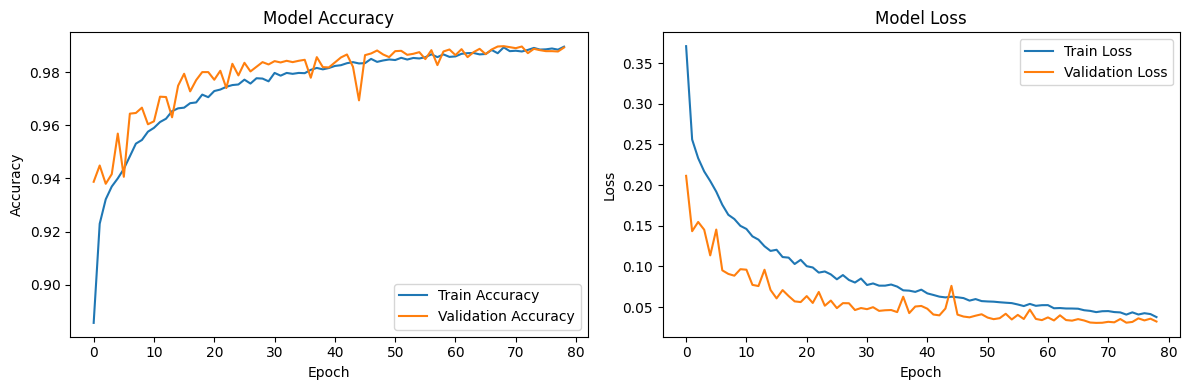

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
model.save('/content/drive/MyDrive/Thesis/backorder_lstm_model_dataset_3_2.h5')
print("LSTM model saved successfully!")

LSTM model saved successfully!
